<img src="./images/DLI_Header.png" style="width: 400px;">

# Assessment

Congratulations on going through today's course! Hopefully, you've learned some valuable skills along the way and had fun doing it. Now it's time to put those skills to the test. In this assessment, you will train a new model that is able to recognize fresh and rotten fruit. You will need to get the model to a validation accuracy of `92%` in order to pass the assessment, though we challenge you to do even better if you can. You will have the use the skills that you learned in the previous exercises. Specifically, we suggest using some combination of transfer learning, data augmentation, and fine tuning. Once you have trained the model to be at least 92% accurate on the validation dataset, save your model, and then assess its accuracy. Let's get started! 

## The Dataset

In this exercise, you will train a model to recognize fresh and rotten fruits. The dataset comes from [Kaggle](https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification), a great place to go if you're interested in starting a project after this class. The dataset structure is in the `data/fruits` folder. There are 6 categories of fruits: fresh apples, fresh oranges, fresh bananas, rotten apples, rotten oranges, and rotten bananas. This will mean that your model will require an output layer of 6 neurons to do the categorization successfully. You'll also need to compile the model with `categorical_crossentropy`, as we have more than two categories.

<img src="./images/fruits.png" style="width: 600px;">

## Load ImageNet Base Model

We encourage you to start with a model pretrained on ImageNet. Load the model with the correct weights, set an input shape, and choose to remove the last layers of the model. Remember that images have three dimensions: a height, and width, and a number of channels. Because these pictures are in color, there will be three channels for red, green, and blue. We've filled in the input shape for you. This cannot be changed or the assessment will fail. If you need a reference for setting up the pretrained model, please take a look at [notebook 05b](05b_presidential_doggy_door.ipynb) where we implemented transfer learning.

In [2]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


## Freeze Base Model

Next, we suggest freezing the base model, as done in [notebook 05b](05b_presidential_doggy_door.ipynb). This is done so that all the learning from the ImageNet dataset does not get destroyed in the initial training.

In [3]:
# Freeze base model
base_model.trainable = False

## Add Layers to Model

Now it's time to add layers to the pretrained model. [Notebook 05b](05b_presidential_doggy_door.ipynb) can be used as a guide. Pay close attention to the last dense layer and make sure it has the correct number of neurons to classify the different types of fruit.

In [4]:
# Create inputs with correct shape
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer
outputs = keras.layers.Dense(6, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs, outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 14,717,766
Trainable params: 3,078
Non-trainable params: 14,714,688
_________________________________________________________________


## Compile Model

Now it's time to compile the model with loss and metrics options. Remember that we're training on a number of different categories, rather than a binary classification problem.

In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Augment the Data

If you'd like, try to augment the data to improve the dataset. Feel free to look at [notebook 04a](04a_asl_augmentation.ipynb) and [notebook 05b](05b_presidential_doggy_door.ipynb) for augmentation examples. There is also documentation for the [Keras ImageDataGenerator class](https://keras.io/api/preprocessing/image/#imagedatagenerator-class). This step is optional, but it may be helpful to get to 92% accuracy.

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True) # we don't expect Bo to be upside-down so we will not flip vertically

## Load Dataset

Now it's time to load the train and validation datasets. Pick the right folders, as well as the right `target_size` of the images (it needs to match the height and width input of the model you've created). If you'd like a reference, you can check out [notebook 05b](05b_presidential_doggy_door.ipynb).

In [8]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('data/fruits/train/', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode="categorical")
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('data/fruits/valid', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode="categorical")

Found 1182 images belonging to 6 classes.
Found 329 images belonging to 6 classes.


## Train the Model

Time to train the model! Pass the `train` and `valid` iterators into the `fit` function, as well as setting your desired number of epochs.

In [9]:
model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=train_it.samples/train_it.batch_size,
          validation_steps=valid_it.samples/valid_it.batch_size,
          epochs=30)

Epoch 1/30
37/36 [==============================] - 27s 717ms/step - loss: 2.5767 - accuracy: 0.4704 - val_loss: 1.1558 - val_accuracy: 0.6869
Epoch 2/30
37/36 [==============================] - 22s 594ms/step - loss: 0.8002 - accuracy: 0.7496 - val_loss: 0.7317 - val_accuracy: 0.7812
Epoch 3/30
37/36 [==============================] - 20s 537ms/step - loss: 0.4388 - accuracy: 0.8697 - val_loss: 0.4660 - val_accuracy: 0.8389
Epoch 4/30
37/36 [==============================] - 20s 533ms/step - loss: 0.2768 - accuracy: 0.8985 - val_loss: 0.2820 - val_accuracy: 0.9027
Epoch 5/30
37/36 [==============================] - 20s 534ms/step - loss: 0.2128 - accuracy: 0.9289 - val_loss: 0.3007 - val_accuracy: 0.9179
Epoch 6/30
37/36 [==============================] - 20s 542ms/step - loss: 0.1841 - accuracy: 0.9315 - val_loss: 0.2143 - val_accuracy: 0.9271
Epoch 7/30
37/36 [==============================] - 20s 538ms/step - loss: 0.1406 - accuracy: 0.9594 - val_loss: 0.2834 - val_accuracy: 0.9119

In [10]:
model.evaluate(valid_it, steps=valid_it.samples/valid_it.batch_size)

11/10 [================================] - 4s 347ms/step - loss: 0.1272 - accuracy: 0.9696


[0.12717899680137634, 0.9696048498153687]

## Unfreeze Model for Fine Tuning

If you have reached 92% validation accuracy already, this next step is optional. If not, we suggest fine tuning the model with a very low learning rate.

In [11]:
# Unfreeze the base model
base_model.trainable = True

# Compile the model with a low learning rate
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),
              loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [12]:
model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=train_it.samples/train_it.batch_size,
          validation_steps=valid_it.samples/valid_it.batch_size,
          epochs=10)

Epoch 1/10
37/36 [==============================] - 35s 946ms/step - loss: 0.0933 - accuracy: 0.9721 - val_loss: 0.2156 - val_accuracy: 0.9453
Epoch 2/10
37/36 [==============================] - 22s 596ms/step - loss: 0.0449 - accuracy: 0.9848 - val_loss: 0.1254 - val_accuracy: 0.9757
Epoch 3/10
37/36 [==============================] - 21s 578ms/step - loss: 0.0287 - accuracy: 0.9907 - val_loss: 0.3006 - val_accuracy: 0.9483
Epoch 4/10
37/36 [==============================] - 21s 572ms/step - loss: 0.0291 - accuracy: 0.9898 - val_loss: 0.1537 - val_accuracy: 0.9696
Epoch 5/10
37/36 [==============================] - 22s 586ms/step - loss: 0.0454 - accuracy: 0.9873 - val_loss: 0.1528 - val_accuracy: 0.9696
Epoch 6/10
37/36 [==============================] - 22s 594ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.2415 - val_accuracy: 0.9483
Epoch 7/10
37/36 [==============================] - 22s 606ms/step - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.8167 - val_accuracy: 0.8784

## Evaluate the Model

Hopefully, you now have a model that has a validation accuracy of 92% or higher. If not, you may want to go back and either run more epochs of training, or adjust your data augmentation. 

Once you are satisfied with the validation accuracy, evaluate the model by executing the following cell. The evaluate function will return a tuple, where the first value is your loss, and the second value is your accuracy. To pass, the model will need have an accuracy value of `92% or higher`. 

In [13]:
model.evaluate(valid_it, steps=valid_it.samples/valid_it.batch_size)

11/10 [================================] - 4s 351ms/step - loss: 0.1743 - accuracy: 0.9787


[0.1743062138557434, 0.978723406791687]

## Run the Assessment

To assess your model run the following two cells.

**NOTE:** `run_assessment` assumes your model is named `model` and your validation data iterator is called `valid_it`. If for any reason you have modified these variable names, please update the names of the arguments passed to `run_assessment`.

In [14]:
from run_assessment import run_assessment

In [15]:
run_assessment(model, valid_it)

Evaluating model 5 times to obtain average accuracy...

11/10 [================================] - 4s 354ms/step - loss: 0.0416 - accuracy: 0.9909

Accuracy required to pass the assessment is 0.92 or greater.
Your average accuracy is 0.9891.

Congratulations! You passed the assessment!
See instructions below to generate a certificate.


## Generate a Certificate

If you passed the assessment, please return to the course page (shown below) and click the "ASSESS TASK" button, which will generate your certificate for the course.

<img src="./images/assess_task.png" style="width: 800px;">

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

array([[1.0000000e+00, 4.9308111e-25, 5.4670159e-14, 6.7173013e-14,
        1.1140424e-28, 2.6186348e-17]], dtype=float32)

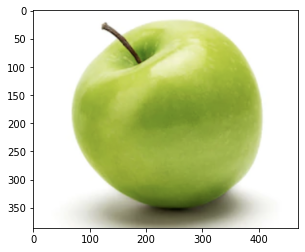

In [17]:
make_predictions('data/fruits/valid/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png')

array([[5.7238562e-05, 9.9994195e-01, 8.0998223e-07, 1.8898264e-08,
        3.2007595e-08, 2.1922344e-14]], dtype=float32)

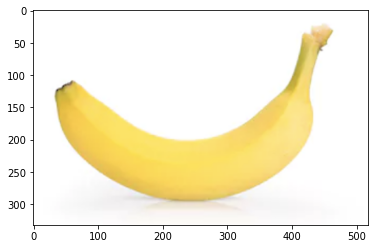

In [18]:
make_predictions('data/fruits/valid/freshbanana/Screen Shot 2018-06-12 at 10.00.37 PM.png')